## 12장 앙상블 모형

### (1) 보팅 앙상블 실습

#### 1) 분류 예측 실습

- 변수 지정 및 전처리

In [1]:
#1. 모듈 및 함수 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

#2. 데이터 불러오기 
df = pd.read_csv('Ashopping.csv', encoding = 'cp949')

#3. 변수 지정 및 데이터 세트 분할
X = df[['방문빈도', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액', '거래기간', '평균 구매주기', '구매유형']]
Y = df['고객등급']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 전처리(표준화, 원핫인코딩)
ct = ColumnTransformer([("scaling", StandardScaler(), ['1회 평균매출액', '방문빈도', '총 할인 금액', '할인권 사용 횟수', '거래기간', '평균 구매주기']), ("onehot", OneHotEncoder(sparse = False, handle_unknown = 'ignore'), [ '구매유형'])])
ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)

#4. 오버샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)


- 모형 학습 및 예측

In [2]:
#1. 모듈 및 함수 불러오기
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#2. 단일 모형 객체 생성 (의사결정나무 모형, K-NN 모형)
dtree = DecisionTreeClassifier(random_state=0) 
knn = KNeighborsClassifier()

#3. 소프트 보팅 기반의 앙상블 모형 생성
model = VotingClassifier(estimators=[('K-NN',knn), ('Dtree',dtree)] , voting ='soft' )

#4. 모형 학습 및 예측
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print('평가용 데이터 세트에 대한 예측값\n', Y_pred)


평가용 데이터 세트에 대한 예측값
 [2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 1 2 1 2 2 2 2 1 1 2 1 1 1 2 1 2 1 1 2 2 2 2
 1 2 2 1 1 2 2 1 1 2 1 1 2 2 1 1 2 2 1 1 1 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 1
 2 2 2 2 1 1 1 1 1 1 2 1 2 1 2 1 2 2 1 1 1 2 2 2 1 1 1 2 1 2 1 2 1 2 2 2 1
 2 2 1 1 1 2 1 1 1 2 2 1 2 2 1 1 1 2 2 2 1 2 2 1 2 1 2 2 1 2 1 1 1 2 2 1 1
 2 2 1 1 1 2 1 2 1 2 2 1 1 1 2 2 2 1 2 2 1 2 1 1 2 1 1 1 1 2 2 2 1 1 2 1 2
 1 1 2 1 2 1 1 1 2 1 2 2 1 1 2 2 2 1 1 2 2 2 2 1 1 1 1 1 1 1 2 2 2 1 1 2 2
 2 1 1 2 1 2 1 2 1 2 1 1 1 2 1 1 1 2 1 1 2 1 2 1 2 2 2 2 1 2 2 1 1 1 2 2 2
 1 2 2 2 2 1 1 2 1 2 2 2 2 1 2 1 2 1 2 2 2 1 2 1 2 1 1 2 1 1 1 1 1 2 2 1 1
 1 1 2 1]


- 모형 평가

In [3]:
#1. 보팅 모형의 정확도 
print('Voting 분류기 정확도: {0:.3f}'.format(model.score(X_test , Y_test)))

#2. 개별 모형의 정확도
classifiers = [dtree, knn]
for classifier in classifiers:
    classifier.fit(X_train , Y_train)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.3f}'.format(class_name, classifier.score(X_test , Y_test)))


Voting 분류기 정확도: 0.793
DecisionTreeClassifier 정확도: 0.773
KNeighborsClassifier 정확도: 0.667


In [4]:
from sklearn.metrics import classification_report  
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           1       0.76      0.80      0.78       138
           2       0.82      0.79      0.81       162

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



#### 2) 수치 예측 실습

- 변수 지정 및 전처리

In [5]:
#1. 변수 지정(독립변수/종속변수)
X = df[['Recency', 'Frequency', 'Monetary', '총매출액', '방문빈도']]
Y = df['구매카테고리수']

#2. 데이터 분할(학습용/평가용 데이터 세트)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 표준화 
scaler = StandardScaler()
scaler.fit(X_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)
print(X_train)


[[ 1.20405628 -0.20091988  0.57229336  0.69336175  0.03475125]
 [ 1.20405628 -0.20091988  1.21739053 -0.225208   -0.17540748]
 [ 0.06738818  0.97601664 -0.07280382 -0.52055725  0.98046554]
 ...
 [ 1.20405628 -0.20091988  1.21739053 -0.60960507 -0.01778844]
 [-0.50094587 -0.78938814 -1.36299818 -0.02842033 -0.22794717]
 [-1.06927992  1.5644849   1.21739053 -0.30394592 -0.70080431]]


- 모형 학습 및 예측

In [6]:
#1. 모듈 및 함수 불러오기
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

#2. 단일 모형 객체 생성 (SVR 모형, k-NN 모형))
svr= SVR( )					 
mlp=MLPRegressor(random_state=0)	

#3. 보팅 앙상블 모형 생성
model = VotingRegressor(estimators=[('SVR',svr),('MLP',mlp)] )

#4. 모형 학습 및 예측
model.fit(X_train , Y_train)
Y_pred = model.predict(X_test) 
print('평가용 데이터 세트에 대한 예측값\n', Y_pred)


평가용 데이터 세트에 대한 예측값
 [2.00706948 4.5669254  1.74249683 7.63613622 6.40221522 7.2730901
 5.75623758 4.74255615 6.82849588 6.93125122 3.2053192  4.70022877
 5.63727114 3.88106944 8.33211371 3.11600832 3.39365606 4.70086425
 3.78094348 5.34174242 5.01244468 3.08396247 6.93352678 3.38300584
 6.96099569 6.86808214 2.9158183  4.06098619 5.76216331 5.8200694
 7.30736983 6.94866784 3.35858298 7.44702155 1.88736993 5.58873307
 2.04762641 1.91513529 5.20069888 5.6110035  5.7138426  7.60508939
 2.03157688 5.72020774 1.96616202 3.98104311 8.9635812  3.88781075
 5.87665848 7.10124939 7.49395375 5.2013576  3.09291002 5.64895624
 6.50887014 4.87983843 5.26743112 2.88630164 7.13009345 5.49379309
 8.37371512 7.32179087 6.92293094 5.79987529 1.95516242 7.65134673
 2.07002211 6.85373071 4.24309458 7.0943764  5.41621262 4.55640693
 5.04379371 5.24175005 3.18489396 6.90443051 4.99653884 5.57660943
 5.15821272 2.07065684 3.01917079 4.73868116 3.93272535 8.37163623
 3.92674628 6.86512944 3.85703709 3.41091456

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


- 모형 평가

In [7]:
#1. 보팅 모형의 결정계수 
model.fit(X_train , Y_train)
print('Voting 앙상블 결정계수: {0:.3f}'.format(model.score(X_train , Y_train)))

#2. 개별 모형의 결정계수
Regressors = [svr, mlp]
for Regressor in Regressors:
    Regressor.fit(X_train , Y_train)
    class_name= Regressor.__class__.__name__
    print('{0} 결정계수: {1:.3f}'.format(class_name, Regressor.score(X_train , Y_train)))


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Voting 앙상블 결정계수: 0.771
SVR 결정계수: 0.767
MLPRegressor 결정계수: 0.757


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
#1. 모듈 및 함수 불러오기
from sklearn.metrics import mean_squared_error
from math import sqrt

#2. RMSE 계산
rmse= sqrt(mean_squared_error(Y_test, Y_pred))
print('RMSE:{:.3f}'.format(rmse))


RMSE:1.274


### (2) 랜덤 포레스트 실습

#### 1) 분류 예측 실습

- 변수 지정 및 전처리

In [9]:
#1. 변수 지정 및 데이터 세트 분할
X = df[['방문빈도', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액', '거래기간', '평균 구매주기', '구매유형']]
Y = df['고객등급']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#2. 오버 샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)


- 모형 학습 및 평가

In [10]:
#1. 모듈 및 함수 불러오기
from sklearn.ensemble import RandomForestClassifier

#2. 모형 생성 
model = RandomForestClassifier(random_state = 0, n_estimators= 300, max_depth = 5)

#3. 모형 학습 및 예측
model.fit(X_train, Y_train)

#3. 평가용 데이터 세트에 대한 예측값 출력
Y_pred = model.predict(X_test)
print('평가용 데이터 세트에 대한 예측값\n', Y_pred)


평가용 데이터 세트에 대한 예측값
 [2 2 2 2 2 2 2 2 1 2 1 1 2 1 2 2 2 1 2 1 1 2 2 1 2 1 1 1 1 1 2 1 1 2 2 2 2
 2 2 2 1 1 2 2 1 1 1 2 1 2 2 1 1 2 2 1 1 2 2 2 1 2 2 2 1 1 2 1 1 1 2 1 1 1
 2 2 1 2 1 1 1 1 1 1 2 1 1 1 2 1 2 2 2 1 1 2 2 2 1 2 1 1 1 2 1 2 1 1 2 2 1
 2 2 1 1 1 2 1 1 1 2 1 2 2 2 1 1 1 2 1 1 1 2 2 1 2 1 2 1 2 2 2 1 2 2 2 1 1
 2 2 1 2 1 2 1 1 1 2 2 2 1 1 2 2 1 2 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 2
 1 1 2 1 2 2 2 1 1 1 2 1 2 1 2 2 2 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 2 1 1 2 1 2 1 2 1 2 1 1 1 2 1 1 1 2 1 1 2 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 2
 2 2 1 2 2 1 2 2 1 2 2 2 2 1 2 1 2 2 2 1 1 1 2 1 2 1 1 2 1 2 2 1 1 2 2 1 1
 2 1 2 1]


- 모형 평가

In [11]:
print('학습용 데이터 세트 정확도: {:.3f}'.format(model.score(X_train, Y_train)))
print('평가용 데이터 세트 정확도: {:.3f}'.format(model.score(X_test, Y_test)))


학습용 데이터 세트 정확도: 0.885
평가용 데이터 세트 정확도: 0.773


In [12]:
from sklearn.metrics import classification_report  
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           1       0.72      0.83      0.77       138
           2       0.83      0.73      0.78       162

    accuracy                           0.77       300
   macro avg       0.78      0.78      0.77       300
weighted avg       0.78      0.77      0.77       300



#### 2) 수치 예측 실습

- 변수 지정 및 전처리

In [13]:
#1. 변수 지정(독립변수/종속변수)
X = df[['Recency', 'Frequency', 'Monetary', '총매출액', '방문빈도']]
Y = df['구매카테고리수']

#2. 데이터 분할(학습용/평가용 데이터 세트)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


- 모형 학습 및 예측

In [14]:
#1. 모듈 및 함수 불러오기
from sklearn.ensemble import RandomForestRegressor

#2. 모형 생성
model = RandomForestRegressor(random_state=0, n_estimators= 100, max_depth = 4)

#3. 모형 학습 및 예측
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print('평가용 데이터 세트에 대한 예측값\n', Y_pred)


평가용 데이터 세트에 대한 예측값
 [1.93831196 4.70263637 1.93749465 7.55753414 7.2217489  7.4156698
 5.57655361 5.26619197 7.19852396 7.38324125 2.96873566 5.2033276
 5.58424369 3.8297234  7.57759347 3.05454441 3.05454441 5.2033276
 4.58368272 4.62449282 5.28534552 3.02201866 7.38324125 3.00331743
 7.38324125 6.96007451 3.00331743 3.8297234  3.69690238 5.56171821
 7.4156698  7.38324125 3.00331743 6.69121997 1.93831196 5.58424369
 1.93831196 1.93863751 5.57655361 5.58424369 5.57236704 8.61927157
 1.93831196 5.71893662 1.93378243 3.85869853 8.47322748 3.8297234
 4.59633588 7.19418559 7.55753414 5.34866151 3.00331743 5.58424369
 7.15324884 4.52053166 5.01134468 3.21959914 7.4156698  5.58424369
 8.67781574 7.47802054 6.36005416 4.58084445 1.93831196 8.61927157
 1.93831196 7.38324125 4.83997712 7.25228284 5.57655361 2.62390551
 5.28534552 5.35152348 3.05454441 7.38324125 5.3050983  5.58424369
 5.26537543 1.93945481 3.00331743 5.24920822 3.8297234  8.67781574
 3.83889046 7.38324125 3.8297234  3.00331743 7

- 모형 평가

In [15]:
print('학습용 데이터 세트 결정계수: {:.3f}'.format(model.score(X_train, Y_train)))
print('평가용 데이터 세트 결정계수: {:.3f}'.format(model.score(X_test, Y_test)))


학습용 데이터 세트 결정계수: 0.844
평가용 데이터 세트 결정계수: 0.742


In [16]:
rmse= sqrt(mean_squared_error(Y_test, Y_pred))
print('RMSE:{:.3f}'.format(rmse))


RMSE:1.150


#### 3) 그래디언트 부스팅 실습

- 변수 지정 및 전처리

In [17]:
X = df[['방문빈도', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액', '거래기간', '평균 구매주기', '구매유형']]
Y = df['고객등급']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#3. 오버 샘플링
smote = SMOTE(random_state=0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)


- 모형 학습 및 예측

In [18]:
#1. 모듈 및 함수 불러오기
from sklearn.ensemble import GradientBoostingClassifier

#2. 모형 생성
model=GradientBoostingClassifier(random_state=0,  n_estimators=100, max_depth=2, learning_rate=0.1)

#3. 모형 학습 및 예측
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print('평가용 데이터 세트에 대한 예측값\n', Y_pred)


평가용 데이터 세트에 대한 예측값
 [2 2 2 2 2 2 1 2 1 2 1 1 2 1 2 2 2 1 2 2 1 2 2 1 2 1 1 1 1 1 2 1 1 2 2 2 2
 2 2 2 1 1 2 2 1 1 1 1 1 2 2 1 1 2 2 1 1 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 1 1
 2 2 2 2 1 1 1 1 1 1 2 1 2 1 2 1 2 2 1 1 1 2 2 2 1 1 1 1 1 2 1 2 1 1 2 2 1
 2 2 1 1 1 2 1 1 1 2 1 2 2 2 1 1 1 2 2 1 1 2 2 1 2 1 2 2 2 2 1 1 2 2 2 1 1
 2 2 1 2 1 2 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 2 1 1 2 1 1 1 1 2 2 2 1 2 2 1 2
 1 1 2 1 2 1 1 1 2 1 2 2 1 1 2 2 2 1 1 2 2 2 2 1 1 1 1 1 1 1 1 2 1 2 1 2 2
 2 1 1 2 1 2 1 2 1 2 1 1 2 2 1 1 1 2 1 1 2 1 2 1 2 2 2 2 1 1 2 1 1 1 1 1 2
 2 2 1 2 1 1 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 1 2 1 2 1 1 2 1 1 2 1 1 2 2 1 1
 2 1 2 1]


- 모형 평가

In [19]:
print('학습용 데이터 세트 정확도: {:.3f}'.format(model.score(X_train, Y_train)))
print('평가용 데이터 세트 정확도: {:.3f}'.format(model.score(X_test, Y_test)))


학습용 데이터 세트 정확도: 0.882
평가용 데이터 세트 정확도: 0.803


In [20]:
from sklearn.metrics import classification_report  
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           1       0.77      0.83      0.79       138
           2       0.84      0.78      0.81       162

    accuracy                           0.80       300
   macro avg       0.80      0.81      0.80       300
weighted avg       0.81      0.80      0.80       300



#### 2) 수치 예측 실습

- 변수 지정 및 전처리

In [21]:
#1. 변수 지정(독립변수/종속변수)
X = df[['총매출액', '방문빈도', 'Recency', 'Frequency', 'Monetary']]
Y = df['구매카테고리수']

#2. 데이터 분할(학습용/평가용 데이터 세트) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


- 모형 학습 및 예측

In [22]:
#1. 모듈 및 함수 불러오기
from sklearn.ensemble import GradientBoostingRegressor

#2. 모형 생성
model = GradientBoostingRegressor(random_state =0, max_depth=2, n_estimators = 100, learning_rate=0.1)

#3. 모형 학습 및 예측
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print('평가용 데이터 세트에 대한 예측값\n', Y_pred)


평가용 데이터 세트에 대한 예측값
 [1.89219184 4.75703192 1.90784162 7.47409247 6.28556628 7.453841
 5.78116906 5.31616757 6.73628658 7.3146796  2.85721856 5.16548974
 5.73733674 3.88788524 7.76439432 2.85844578 2.85844578 5.16548974
 2.97056508 5.14709044 5.16392684 2.87385354 7.3146796  2.87130543
 7.25526436 7.31479913 2.87286833 4.0879744  3.44486867 5.76708219
 7.453841   7.34409787 2.85721856 7.04113616 1.89219184 5.6779215
 1.89219184 2.04164246 5.30888463 5.6779215  5.72070177 7.71495752
 1.89219184 5.91266203 1.90661439 4.21556122 8.73820418 4.03653758
 3.6353333  6.44467063 7.47409247 5.16392684 2.82688583 5.73733674
 6.73168533 4.76989157 5.07400872 3.63081774 7.453841   5.72430192
 8.44174693 7.51759172 5.6322943  5.03924743 1.9075996  7.63185468
 1.89219184 7.3121315  4.71921399 6.87738955 5.72430192 1.60214346
 5.11950723 5.11950723 2.85844578 7.3146796  5.23025148 5.6779215
 5.06450964 1.86063189 3.00632543 5.13515701 3.95451731 8.29264007
 2.74499221 7.3121315  3.88550134 2.85721856 7

- 모형 평가

In [23]:
print('학습용 데이터 세트 결정계수: {:.3f}'.format(model.score(X_train, Y_train)))
print('평가용 데이터 세트 결정계수: {:.3f}'.format(model.score(X_test, Y_test)))


학습용 데이터 세트 결정계수: 0.841
평가용 데이터 세트 결정계수: 0.726


In [24]:
rms = sqrt(mean_squared_error(Y_test, Y_pred))
print('RMSE:{:.3f}'.format(rms))

RMSE:1.186


### (3) 모형 성능 비교

* 보팅 분류 모형 생성

In [25]:
#1. 종속변수 값 변환
df.고객등급[df.고객등급 == 1] = 0
df.고객등급[df.고객등급 == 2] = 1

#2. 변수 지정 및 데이터 세트 분할
X1 = df[['방문빈도', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액', '거래기간', '평균 구매주기', '구매유형']]
Y1 = df['고객등급']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=0)

#3. 전처리(표준화, 원핫인코딩)
ct = ColumnTransformer([("scaling", StandardScaler(), ['1회 평균매출액', '방문빈도', '총 할인 금액', '할인권 사용 횟수', '거래기간', '평균 구매주기']), ("onehot", OneHotEncoder(sparse = False, handle_unknown = 'ignore'), [ '구매유형'])])
ct.fit(X1_train)
X1_train=ct.transform(X1_train)
X1_test=ct.transform(X1_test)

#4. 오버샘플링
smote = SMOTE(random_state=0)
X1_train, Y1_train = smote.fit_resample(X1_train, Y1_train)

#5. 단일 모형 객체 생성(K-NN 모형, 의사결정나무 모형)
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier(random_state=0) 

#6. 소프트 보팅 기반의 보팅 모형 생성
voting = VotingClassifier(estimators=[('K-NN', knn), ('Dtree', dtree)], voting ='soft')

#4. 모형 학습 및 예측
voting.fit(X1_train, Y1_train)
Y1_pred = voting.predict(X1_test)

<ipython-input-25-fd72449f5ab0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.고객등급[df.고객등급 == 1] = 0
<ipython-input-25-fd72449f5ab0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.고객등급[df.고객등급 == 2] = 1


* 랜덤 포레스트 분류 모형 생성

In [26]:
#1. 변수 지정(독립변수/종속변수)
X2 = df[['방문빈도', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액', '거래기간', '평균 구매주기', '구매유형']]
Y2 = df['고객등급']

#2. 데이터 세트 분할(독립변수/종속변수)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=0)

#3. 오버 샘플링
smote = SMOTE(random_state=0)
X2_train, Y2_train = smote.fit_resample(X2_train, Y2_train)

#4. 모형 생성 
RFC = RandomForestClassifier(random_state = 0, n_estimators= 300, max_depth = 5)

#5. 모형 학습 및 예측
RFC.fit(X2_train, Y2_train)
Y2_pred = RFC.predict(X2_test)

* 그래디언트 부스팅 분류 모형 생성

In [27]:
#1. 변수 지정(독립변수/종속변수)
X3 = df[['방문빈도', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액', '거래기간', '평균 구매주기', '구매유형']]
Y3 = df['고객등급']

#2. 데이터 세트 분할(독립변수/종속변수)
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.3, random_state=0)

#3. 오버 샘플링
smote = SMOTE(random_state=0)
X3_train, Y3_train = smote.fit_resample(X3_train, Y3_train)

#4. 모형 생성
GBC=GradientBoostingClassifier(random_state=0, n_estimators=100, max_depth=2, learning_rate=0.1)

#5. 모형 학습 및 예측
GBC.fit(X3_train, Y3_train)
Y_pred3 = GBC.predict(X3_test)

* ROC 곡선 및 ACU 점수 출력

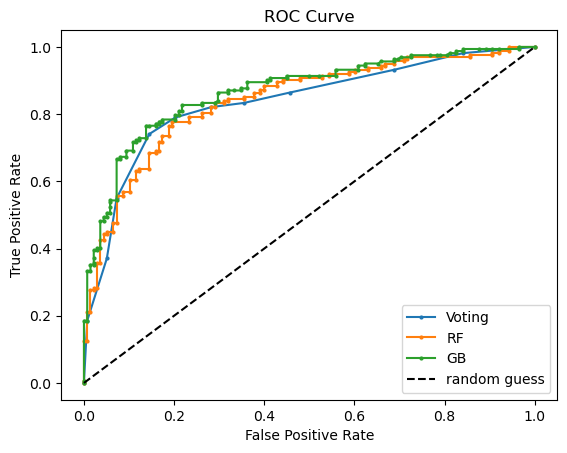

보팅 AUC 점수:0.836
랜덤 포레스트 AUC 점수::0.842
그래디언트 부스팅 AUC 점수:0.869


In [28]:
#1. 모듈 및 함수 불러오기
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

#2. ROC 곡선 객체 생성
fpr1, tpr1, thresholds = roc_curve(Y1_test, voting.predict_proba(X1_test)[:, 1])
fpr2, tpr2, thresholds  = roc_curve(Y2_test, RFC.predict_proba(X2_test)[:, 1])
fpr3, tpr3, thresholds = roc_curve(Y3_test, GBC.predict_proba(X3_test)[:, 1])

#3. ROC 곡선 시각화
plt.plot(fpr1, tpr1, 'o-', ms=2, label='Voting')
plt.plot(fpr2, tpr2, 'o-', ms=2, label='RF')
plt.plot(fpr3, tpr3, 'o-', ms=2, label='GB')
plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#4. AUC 점수 계산
Voting_auc=roc_auc_score(Y1_test, voting.predict_proba(X1_test)[:, 1])
RF_auc=roc_auc_score(Y2_test, RFC.predict_proba(X2_test)[:, 1])
GB_auc=roc_auc_score(Y3_test, GBC.predict_proba(X3_test)[:, 1])

#5. AUC 점수 출력
print('보팅 AUC 점수:{:.3f}'.format(Voting_auc))
print('랜덤 포레스트 AUC 점수::{:.3f}'.format(RF_auc))
print('그래디언트 부스팅 AUC 점수:{:.3f}'.format(GB_auc))